![image](https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab07/Images/logo-mecanica.png?raw=1)

# Laboratorio 7: Resolución de Ecuaciones Diferenciales Ordinarias

Este notebook repasa los **métodos numéricos** para encontrar soluciones aproximadas a Ecuaciones Diferenciales Ordinarias (EDOs). Se incluye una breve revisión de la teoría y los algoritmos generales de cada método, seguida de ejercicios prácticos.

## 1. Repaso de la teoría

**Problema General:** La gran mayoría de los problemas de ingeniería involucran ecuaciones diferenciales. Las leyes que rigen el comportamiento de los sistemas físicos se suelen expresar mediante ecuaciones diferenciales. La dificultad para resolver estas ecuaciones depende de su naturaleza (lineales o no lineales), el número de variables independientes, y las condiciones a la frontera. Pueden involucrar derivadas parciales, ordinarias, mixtas, etc.

Si bien existen soluciones analíticas para algunos casos, **para la mayoría de los problemas se utilizan métodos numéricos** que permiten aproximar la solución de manera eficiente.

**Ecuación Diferencial Ordinaria (EDO):** Una ecuación que relaciona una función desconocida $y$ con sus derivadas respecto a una **sola variable independiente**. Su forma general es $F(x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, ..., \frac{d^ny}{dx^n}) = 0$. Se define el **orden** de una EDO como el mayor orden de derivada presente. Vamos a requerir que la ecuación diferencial **tenga** una solución y que, además, esta sea **única**. Para ello es necesario complementar el problema mediante **condiciones de frontera** y requeriremos tantas de estas como el **orden** de la EDO.

**Problema de Valor Inicial (PVI) o Problema de Cauchy:** Es un tipo de problema asociado a una EDO donde se especifica el valor de la función y, posiblemente, sus derivadas en un punto inicial $x_0$. Un PVI de primer orden tiene la forma:

$$ \frac{dy}{dx} = f(x, y) $$
$$  y(x_0) = y_0 $$

Una **solución** es una función $y(x)$ que satisface la EDO y cumple con la condición inicial $y(x_0) = y_0$.

Resolver un problema de Cauchy es equivalente a integrar la función $f(x, y)$ desde el punto inicial $x_0$ hasta el punto $x$: $y(x) = y_0 + \int_{x_0}^x f(\tau, y(\tau))d\tau$.

Consideraremos exclusivamente EDOs de primer orden, ya que las ecuaciones de orden superior pueden ser reducidas a un sistema de EDOs de primer orden. Por ejemplo, la Segunda Ley de Newton $m \frac{d^2y}{dt^2} = F(y, \frac{dy}{dt})$ se puede reescribir como un sistema de dos EDOs de primer orden acopladas: $$\frac{dy}{dt} = v$$ $$m \frac{dv}{dt} = F(y, v)$$.

Los métodos de resolución que revisaremos incluyen: Método de Euler Explícito, Método de Euler Implícito, Método de Crank-Nicolson, y Métodos de Runge-Kutta.

### 1.1 Método de Euler Explícito

El método de Euler Explícito se basa en la aproximación de la integral en la solución del PVI ($y(x) = y_0 + \int_{x_0}^x f(\tau, y(\tau))d\tau$) dividiendo el intervalo $[x_0, x]$ en $N$ subintervalos y aproximando la integral en cada subintervalo mediante **sumas por izquierda**.
$$ \int_{x_i}^{x_{i+1}} f(\tau, y(\tau))d\tau \approx f(x_i, y_i)\Delta x $$
Esto lleva a la fórmula iterativa:
$$ y_{i+1} = y_i + f(x_i, y_i)\Delta x $$

**Algoritmo General:**

```python
Algorithm 1 Método de Euler Explícito
1: Input: x0, y0, f(x, y), ∆x, xfinal
2: i ← 0
3: while xi < xfinal do
4:     yi+1 ← yi + f(xi, yi)∆xi
5:     xi+1 ← xi + ∆xi
6:     i ← i + 1
7: end while
8: Output: y
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def eulerExplicito(x_inicial, y_inicial, func_edo, delta_x, x_final):
    valores_x = [x_inicial]
    valores_y = [y_inicial]
    x_actual = x_inicial
    y_actual = y_inicial
    while x_actual < x_final:
        y_siguiente = y_actual + func_edo(x_actual, y_actual) * delta_x
        x_siguiente = x_actual + delta_x
        valores_x.append(x_siguiente)
        valores_y.append(y_siguiente)
        x_actual = x_siguiente
        y_actual = y_siguiente
    return np.array(valores_x), np.array(valores_y)

### 1.2 Método de Euler Implícito

Similar al método explícito, el método de Euler Implícito aproxima la integral ($y(x) = y_0 + \int_{x_0}^x f(\tau, y(\tau))d\tau$) usando la división del intervalo, pero esta vez mediante **sumas por derecha**.
$$ \int_{x_i}^{x_{i+1}} f(\tau, y(\tau))d\tau \approx f(x_{i+1}, y_{i+1})\Delta x $$
Esto resulta en la fórmula iterativa, donde $y_{i+1}$ aparece en el lado derecho de la ecuación (de ahí el término 'implícito'):
$$ y_{i+1} = y_i + f(x_{i+1}, y_{i+1})\Delta x $$

**Algoritmo General:** Note que en cada paso se debe resolver para $y_{i+1}$, lo que puede implicar resolver una ecuación no lineal.

```python
Algorithm 2 Método de Euler Implícito
1: Input: x0, y0, f(x, y), ∆x, xfinal
2: i ← 0
3: while xi < xfinal do
4:     Solve (yi+1 = yi + f(xi+1, yi+1)∆xi) for yi+1
5:     xi+1 ← xi + ∆xi
6:     i ← i + 1
7: end while
8: Output: y
```

In [1]:
def eulerImplicito(x_inicial, y_inicial, func_edo, delta_x, x_final):
    valores_x = [x_inicial]
    valores_y = [y_inicial]
    x_actual = x_inicial
    y_actual = y_inicial
    while x_actual < x_final:
        x_siguiente = x_actual + delta_x
        # Define la función para encontrar la raíz de y_siguiente
        # F(y_next) = y_next - (y_actual + func_edo(x_siguiente, y_next) * delta_x)
        ecuacion = lambda y_siguiente: y_siguiente - (y_actual + func_edo(x_siguiente, y_siguiente) * delta_x)
        y_siguiente = fsolve(ecuacion, y_actual)[0] # Usa el y_actual como suposición inicial
        valores_x.append(x_siguiente)
        valores_y.append(y_siguiente)
        x_actual = x_siguiente
        y_actual = y_siguiente
    return np.array(valores_x), np.array(valores_y)

### 1.3 Método de Crank-Nicolson

El método de Crank-Nicolson también se basa en la integral ($y(x) = y_0 + \int_{x_0}^x f(\tau, y(\tau))d\tau$), dividiendo el intervalo, pero utiliza la **regla del punto medio (o del trapecio)** para aproximar la integral en cada subintervalo.
$$ \int_{x_i}^{x_{i+1}} f(\tau, y(\tau))d\tau \approx \frac{f(x_i, y_i) + f(x_{i+1}, y_{i+1})}{2}\Delta x $$
La fórmula iterativa es:
$$ y_{i+1} = y_i + \frac{f(x_i, y_i) + f(x_{i+1}, y_{i+1})}{2}\Delta x $$

**Algoritmo General:** Similar al método de Euler Implícito, requiere resolver una ecuación (potencialmente no lineal) en cada paso para encontrar $y_{i+1}$.

```python
Algorithm 3 Método de Crank-Nicolson
1: Input: x0, y0, f(x, y), ∆x, xfinal
2: i ← 0
3: while xi < xfinal do
4:     Solve (yi+1 = yi + (f(xi, yi) + f(xi+1, yi+1))/2 * ∆xi) for yi+1
5:     xi+1 ← xi + ∆xi
6:     i ← i + 1
7: end while
8: Output: y
```

In [5]:
def crankNicolson(x_inicial, y_inicial, func_edo, delta_x, x_final):
    valores_x = [x_inicial]
    valores_y = [y_inicial]
    x_actual = x_inicial
    y_actual = y_inicial
    while x_actual < x_final:
        x_siguiente = x_actual + delta_x
        # Define la función para encontrar la raíz de y_siguiente
        # F(y_next) = y_next - (y_actual + (func_edo(x_actual, y_actual) + func_edo(x_siguiente, y_next)) / 2 * delta_x)
        ecuacion = lambda y_siguiente: y_siguiente - (y_actual + (func_edo(x_actual, y_actual) + func_edo(x_siguiente, y_siguiente)) / 2 * delta_x)
        y_siguiente = fsolve(ecuacion, y_actual)[0] # Usa el y_actual como suposición inicial
        valores_x.append(x_siguiente)
        valores_y.append(y_siguiente)
        x_actual = x_siguiente
        y_actual = y_siguiente
    return np.array(valores_x), np.array(valores_y)


### 1.4 Métodos de Runge-Kutta (RK4)

Los métodos de Runge-Kutta forman una familia de métodos del tipo **Predictor-Corrector**. Se basan en la idea de predecir una solución y luego corregirla para mejorar la aproximación. La cantidad de etapas de corrección determina el orden de convergencia del método. Son generalmente métodos explícitos.
Los métodos más comunes son Runge-Kutta de 2do orden (RK2), similar al Método de Heun, con 1 etapa de predicción y 1 de corrección, y Runge-Kutta de 4to orden (RK4), con 1 etapa de predicción y 3 etapas de corrección. Nos centraremos en RK4.

El método RK4 aproxima la integral en cada subintervalo mediante un esquema predictor-corrector que involucra el cálculo de cuatro pendientes (`k1`, `k2`, `k3`, `k4`) dentro del intervalo $[x_i, x_{i+1}]$:
$$ k_1 = f(x_i, y_i) $$
$$ k_2 = f\left( x_i + \frac{\Delta x}{2}, y_i + \frac{k_1\Delta x}{2} \right) $$
$$ k_3 = f\left( x_i + \frac{\Delta x}{2}, y_i + \frac{k_2\Delta x}{2} \right) $$
$$ k_4 = f(x_{i+1}, y_i + k_3\Delta x) $$
La aproximación de la integral en el intervalo es un promedio ponderado de estas pendientes. La fórmula de actualización para $y_{i+1}$ es:
$$ y_{i+1} = y_i + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}\Delta x $$

**Algoritmo General:**
```python
Algorithm 5 Método de Runge-Kutta de 4to orden (RK4)
1: Input: x0, y0, f(x, y), ∆x, xfinal
2: i ← 0
3: while xi < xfinal do
4:     k1 ← f(xi, yi)
5:     k2 ← f(xi + ∆x/2, yi + k1*∆x/2)
6:     k3 ← f(xi + ∆x/2, yi + k2*∆x/2)
7:     k4 ← f(xi + ∆x, yi + k3*∆x) # Note: x_{i+1} = x_i + ∆x
8:     yi+1 ← yi + (k1 + 2*k2 + 2*k3 + k4)*∆x/6
9:     xi+1 ← xi + ∆x
10:    i ← i + 1
11: end while
12: Output: y
```

In [4]:
def RK4(x_inicial, y_inicial, func_edo, delta_x, x_final):
    valores_x = [x_inicial]
    valores_y = [y_inicial]
    x_actual = x_inicial
    y_actual = y_inicial
    while x_actual < x_final:
        k1 = func_edo(x_actual, y_actual)
        k2 = func_edo(x_actual + delta_x / 2, y_actual + k1 * delta_x / 2)
        k3 = func_edo(x_actual + delta_x / 2, y_actual + k2 * delta_x / 2)
        k4 = func_edo(x_actual + delta_x, y_actual + k3 * delta_x)
        y_siguiente = y_actual + (k1 + 2 * k2 + 2 * k3 + k4) * delta_x / 6
        x_siguiente = x_actual + delta_x
        valores_x.append(x_siguiente)
        valores_y.append(y_siguiente)
        x_actual = x_siguiente
        y_actual = y_siguiente
    return np.array(valores_x), np.array(valores_y)

## 2. Ejercicio de Programación

Considere el siguiente Problema de Valor Inicial (PVI):
$$ \frac{dy}{dx} = -2xy $$ $$ y(0) = 1 $$ Esta EDO modela, por ejemplo, una tasa de cambio dependiente tanto de la posición $x$ como del valor de la función $y$ en esa posición. La solución analítica de este PVI es $y(x) = e^{-x^2}$.

**Tarea:**

1.  Implemente los métodos de Euler Explícito, Euler Implícito, Crank-Nicolson, y Runge-Kutta de 4to orden para resolver este PVI en el intervalo $x \in [0,5]$.
2.  Para los métodos implícitos (Euler Implícito, Crank-Nicolson), deberá resolver la ecuación no lineal para $y_{i+1}$ en cada paso. Puede utilizar un método numérico como el Método de Newton (visto en un laboratorio anterior) o `scipy.optimize.fsolve` en Python.
3.  Utilice un tamaño de paso constante $\Delta x$. Experimente con diferentes tamaños de paso (por ejemplo, $\Delta x = 0.1, 0.05, 0.01$) para observar el comportamiento de cada método.
4.  Grafique las soluciones numéricas obtenidas por cada método y compárelas con la solución analítica $y(x) = e^{-x^2}$.
5.  Calcule el error global (por ejemplo, el error en el punto final $x=2$) para cada método y tamaño de paso, y comente sobre la tasa de convergencia observada.


--- Resultados para Δx = 0.1 ---
Error Euler Explícito en x=5: 5.058253e-12
Error Euler Implícito en x=5: 1.427856e-09
Error Crank-Nicolson en x=5: 3.398543e-12
Error RK4 en x=5: 8.951217e-13

--- Resultados para Δx = 0.05 ---
Error Euler Explícito en x=5: 8.369100e-12
Error Euler Implícito en x=5: 2.086420e-10
Error Crank-Nicolson en x=5: 1.827363e-12
Error RK4 en x=5: 5.584844e-14

--- Resultados para Δx = 0.01 ---
Error Euler Explícito en x=5: 7.087516e-12
Error Euler Implícito en x=5: 1.406088e-11
Error Crank-Nicolson en x=5: 1.157442e-13
Error RK4 en x=5: 9.486445e-17


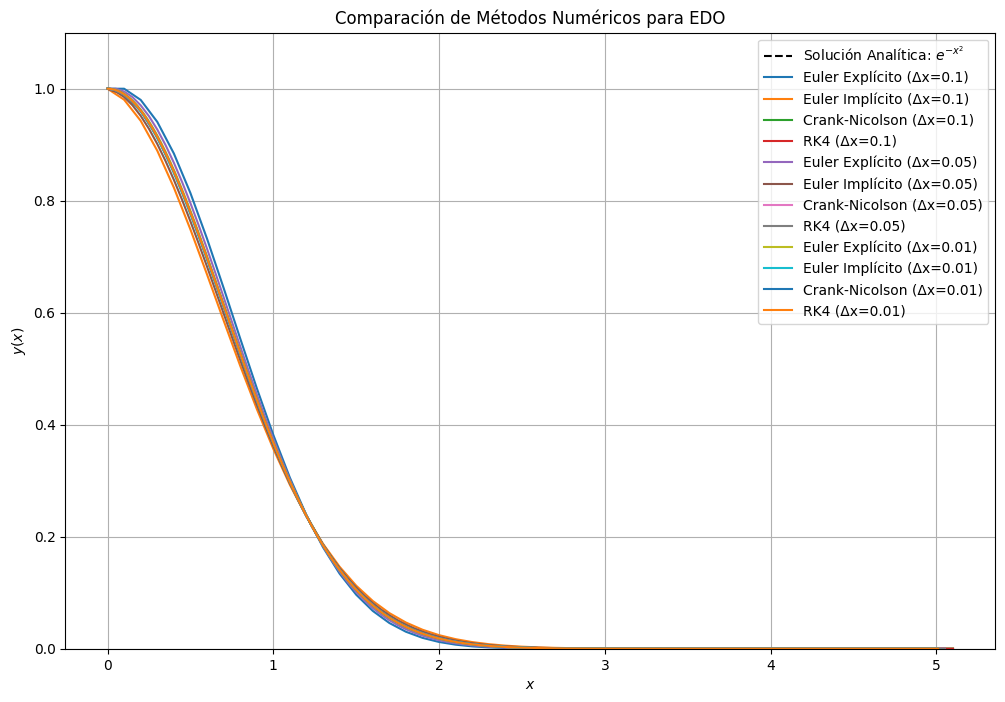


--- Resumen de Errores en x=5 ---
Euler Explícito (Δx=0.1): 5.058253e-12
Euler Implícito (Δx=0.1): 1.427856e-09
Crank-Nicolson (Δx=0.1): 3.398543e-12
RK4 (Δx=0.1): 8.951217e-13
Euler Explícito (Δx=0.05): 8.369100e-12
Euler Implícito (Δx=0.05): 2.086420e-10
Crank-Nicolson (Δx=0.05): 1.827363e-12
RK4 (Δx=0.05): 5.584844e-14
Euler Explícito (Δx=0.01): 7.087516e-12
Euler Implícito (Δx=0.01): 1.406088e-11
Crank-Nicolson (Δx=0.01): 1.157442e-13
RK4 (Δx=0.01): 9.486445e-17

--- Comentarios sobre la Tasa de Convergencia ---
Observaciones:
1. **Método de Euler Explícito:** Es un método de primer orden. El error global es proporcional a $\Delta x$. Al reducir $\Delta x$, el error disminuye linealmente.
2. **Método de Euler Implícito:** También es de primer orden. Su comportamiento de convergencia es similar al explícito en términos de orden, pero puede ser más estable para ciertos problemas.
3. **Método de Crank-Nicolson:** Es un método de segundo orden. El error global es proporcional a $(\Del

In [6]:
#Manuel Casanova Casanova 202141080-5
# Define la función de la EDO
def funcion_edo(x, y):
    return -2 * x * y

# Solución analítica para comparación
def solucion_analitica(x):
    return np.exp(-x**2)
# 1. Implementación y resolución del PVI
x_inicio = 0
y_inicio = 1
x_fin = 5

valores_delta_x = [0.1, 0.05, 0.01]

plt.figure(figsize=(12, 8))
x_sol_analitica = np.linspace(x_inicio, x_fin, 500)
y_sol_analitica = solucion_analitica(x_sol_analitica)
plt.plot(x_sol_analitica, y_sol_analitica, label='Solución Analítica: $e^{-x^2}$', color='black', linestyle='--')

errores = {}

for dx in valores_delta_x:
    print(f"\n--- Resultados para Δx = {dx} ---")

    # Euler Explícito
    x_euler_exp, y_euler_exp = eulerExplicito(x_inicio, y_inicio, funcion_edo, dx, x_fin)
    plt.plot(x_euler_exp, y_euler_exp, label=f'Euler Explícito (Δx={dx})')
    error_euler_exp = abs(y_euler_exp[-1] - solucion_analitica(x_euler_exp[-1]))
    errores[f'Euler Explícito (Δx={dx})'] = error_euler_exp
    print(f"Error Euler Explícito en x={x_fin}: {error_euler_exp:.6e}")

    # Euler Implícito
    x_euler_imp, y_euler_imp = eulerImplicito(x_inicio, y_inicio, funcion_edo, dx, x_fin)
    plt.plot(x_euler_imp, y_euler_imp, label=f'Euler Implícito (Δx={dx})')
    error_euler_imp = abs(y_euler_imp[-1] - solucion_analitica(x_euler_imp[-1]))
    errores[f'Euler Implícito (Δx={dx})'] = error_euler_imp
    print(f"Error Euler Implícito en x={x_fin}: {error_euler_imp:.6e}")

    # Crank-Nicolson
    x_crank_nic, y_crank_nic = crankNicolson(x_inicio, y_inicio, funcion_edo, dx, x_fin)
    plt.plot(x_crank_nic, y_crank_nic, label=f'Crank-Nicolson (Δx={dx})')
    error_crank_nic = abs(y_crank_nic[-1] - solucion_analitica(x_crank_nic[-1]))
    errores[f'Crank-Nicolson (Δx={dx})'] = error_crank_nic
    print(f"Error Crank-Nicolson en x={x_fin}: {error_crank_nic:.6e}")

    # Runge-Kutta de 4to Orden (RK4)
    x_rk4, y_rk4 = RK4(x_inicio, y_inicio, funcion_edo, dx, x_fin)
    plt.plot(x_rk4, y_rk4, label=f'RK4 (Δx={dx})')
    error_rk4 = abs(y_rk4[-1] - solucion_analitica(x_rk4[-1]))
    errores[f'RK4 (Δx={dx})'] = error_rk4
    print(f"Error RK4 en x={x_fin}: {error_rk4:.6e}")

plt.title('Comparación de Métodos Numéricos para EDO')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1) # Ajustar el límite del eje y para una mejor visualización
plt.show()

print("\n--- Resumen de Errores en x=5 ---")
for metodo, error in errores.items():
    print(f"{metodo}: {error:.6e}")

print("\n--- Comentarios sobre la Tasa de Convergencia ---")
print("Observaciones:")
print("1. **Método de Euler Explícito:** Es un método de primer orden. El error global es proporcional a $\\Delta x$. Al reducir $\\Delta x$, el error disminuye linealmente.")
print("2. **Método de Euler Implícito:** También es de primer orden. Su comportamiento de convergencia es similar al explícito en términos de orden, pero puede ser más estable para ciertos problemas.")
print("3. **Método de Crank-Nicolson:** Es un método de segundo orden. El error global es proporcional a $(\\Delta x)^2$. Al reducir $\\Delta x$ a la mitad, se espera que el error disminuya en un factor de cuatro.")
print("4. **Método de Runge-Kutta (RK4):** Es un método de cuarto orden. El error global es proporcional a $(\\Delta x)^4$. Esto significa que pequeñas reducciones en $\\Delta x$ resultan en mejoras muy significativas en la precisión, haciéndolo el método más preciso de los implementados para un dado $\\Delta x$ pequeño.")
print("\nEn general, para el mismo tamaño de paso $\\Delta x$, se observa que RK4 produce el menor error, seguido por Crank-Nicolson, y luego los métodos de Euler. La tasa de convergencia de cada método se corresponde con su orden teórico.")